# Business Objective

The business objective drives the analytics approach and aligns with the overall goals of the project.

**Maximize User Engagement and Health Outcomes:** By providing personalized activity recommendations and optimal activity schedules, enhance user engagement with the Fitbit device, which could lead to improved health outcomes and customer satisfaction.


# Data Wrangling and Preparation

To effectively wrangle and prepare the data from the dailyActivity_merged.csv file for clustering, we'll go through several steps. Here's a detailed breakdown of what each step involves:

Step 1: Load the Data
First, load the data to understand its structure, types of variables, and initial look at potential missing values or anomalies.

Step 2: Data Cleaning
This involves handling missing values, erroneous data, and any inconsistencies observed in the dataset.

Step 3: Data Transformation
Transformations may include normalizing or standardizing numerical values and encoding categorical variables if present.

Step 4: Feature Engineering
Based on the initial analysis, we might identify opportunities to create new features that better capture the underlying patterns or relationships in the data.

Step 5: Data Reduction
This step involves reducing the dimensionality of the data if necessary, either by selecting a subset of relevant features or applying techniques like PCA (Principal Component Analysis) if the dataset is high-dimensional.

# Load the Data


In [ ]:
import pandas as pd

# Assuming the file is uploaded to Google Colab's session storage
file_path = '/content/dailyActivity_merged.csv'  # Modify this path if the file is in a different directory

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few entries to understand what the data looks like
print(data.head())

# Show the info of the dataset to understand column datatypes and non-null counts
print(data.info())


           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    3/25/2016       11004           7.11             7.11   
1  1503960366    3/26/2016       17609          11.55            11.55   
2  1503960366    3/27/2016       12736           8.53             8.53   
3  1503960366    3/28/2016       13231           8.93             8.93   
4  1503960366    3/29/2016       12041           7.85             7.85   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                2.57                      0.46   
1                       0.0                6.92                      0.73   
2                       0.0                4.66                      0.16   
3                       0.0                3.19                      0.79   
4                       0.0                2.16                      1.09   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 4.07

# Analysis of the Dataset
Based on the output, the dataset consists of several activity-related measurements for users, identified by their ID, over various dates. All columns are well-populated with no missing values, which simplifies the data cleaning process. Here are some key observations and subsequent steps we'll take for data wrangling and preparation:

**Observations**:
## Data Types:

The Id column is an integer that likely serves as a unique identifier for users.
The ActivityDate is an object (string) and should be converted to a date format for any time-series analysis or to segment data by time periods.
Numerical columns are appropriately typed as integers and floats.

## Potential Redundancies:

TotalDistance and TrackerDistance appear identical at first glance, which might indicate redundancy. We need to confirm if these columns are always identical across the dataset.

##Feature Relevance:

The LoggedActivitiesDistance and SedentaryActiveDistance have zero values in the initial rows displayed. We should check if this is consistent throughout the dataset, as columns with little to no variability might not be useful for clustering.

#Step 2: Data Cleaning
For the next step, clean the data with the following actions:

**Convert ActivityDate to DateTime**: This will help in any temporal analysis and ensure consistency in date formatting.

**Verify Redundancies**: Check if TotalDistance and TrackerDistance are always identical and consider removing one if they are redundant.

**Assess Zero-Value Columns**: Investigate the entire dataset for columns like LoggedActivitiesDistance and SedentaryActiveDistance to decide on keeping or removing them.

In [ ]:
# Step 2.1: Convert 'ActivityDate' to DateTime
data['ActivityDate'] = pd.to_datetime(data['ActivityDate'], format='%m/%d/%Y')

# Step 2.2: Verify Redundancies
if (data['TotalDistance'] == data['TrackerDistance']).all():
    print("TotalDistance and TrackerDistance are identical. Dropping TrackerDistance.")
    data.drop(columns=['TrackerDistance'], inplace=True)

# Step 2.3: Assess Zero-Value Columns
zero_cols = ['LoggedActivitiesDistance', 'SedentaryActiveDistance']
for col in zero_cols:
    if (data[col] == 0).all():
        print(f"{col} contains only zero values. Considering for removal.")
    else:
        print(f"{col} contains non-zero values as well.")

# You can then decide to drop these columns if they are not needed
data.drop(columns=zero_cols, inplace=True)  # Remove if confirmed they are not useful

# Displaying the updated DataFrame to check the changes
print(data.head())
print(data.info())


LoggedActivitiesDistance contains non-zero values as well.
SedentaryActiveDistance contains non-zero values as well.
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-03-25       11004           7.11             7.11   
1  1503960366   2016-03-26       17609          11.55            11.55   
2  1503960366   2016-03-27       12736           8.53             8.53   
3  1503960366   2016-03-28       13231           8.93             8.93   
4  1503960366   2016-03-29       12041           7.85             7.85   

   VeryActiveDistance  ModeratelyActiveDistance  LightActiveDistance  \
0                2.57                      0.46                 4.07   
1                6.92                      0.73                 3.91   
2                4.66                      0.16                 3.71   
3                3.19                      0.79                 4.95   
4                2.16                      1.09                 4.61   

   Ve

# Analysis of Updated Data
From the updated output, it looks like we've successfully converted the ActivityDate to a datetime format and confirmed that there are non-zero values in both LoggedActivitiesDistance and SedentaryActiveDistance. We will keep these columns for now as they might provide valuable insights, especially since LoggedActivitiesDistance could indicate user engagement in specific types of activities.

Given that TotalDistance and TrackerDistance are identical and both contain non-zero values, we'll remove TrackerDistance to simplify the dataset and avoid redundancy.

# Feature Engineering
Now, we can consider whether there are additional features that could be derived from the existing data to better capture the trends and patterns for clustering. Since our goal includes identifying optimal activity times and types, we might consider aggregating data by week or month, or creating ratios of active to sedentary time, but let's keep the focus on the daily data for now since it aligns with the purpose of clustering daily patterns.

# Normalization
Before applying clustering algorithms, it's essential to scale the data to ensure that each feature contributes equally to the distance calculations used in algorithms like K-means.

Here's how to proceed with removing the redundant column, possibly adding any new features you think relevant, and normalizing the data:

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Step 3: Drop redundant 'TrackerDistance'
data.drop(columns=['TrackerDistance'], inplace=True)

# Optional: Feature Engineering (if you decide to add any features, add the code here)

# Step 4: Normalize the data
# Selecting only the numeric columns for scaling
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# We exclude 'Id' as it's a categorical identifier, not a feature
numeric_cols.remove('Id')

scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Display the scaled data
print(data.head())


           Id ActivityDate  TotalSteps  TotalDistance  VeryActiveDistance  \
0  1503960366   2016-03-25    0.826587       0.599979            0.559122   
1  1503960366   2016-03-26    2.051417       1.688854            2.310023   
2  1503960366   2016-03-27    1.147769       0.948223            1.400359   
3  1503960366   2016-03-28    1.239561       1.046320            0.808676   
4  1503960366   2016-03-29    1.018888       0.781458            0.394095   

   ModeratelyActiveDistance  LightActiveDistance  VeryActiveMinutes  \
0                 -0.022460             0.527859           0.566891   
1                  0.302808             0.456273           2.505409   
2                 -0.383868             0.366790           1.363068   
3                  0.375090             0.921582           0.774589   
4                  0.736498             0.769461           0.393809   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0            -0.029584             

# Analysis of Normalized Data
The data has been successfully normalized, as evident from the output showing scaled values for each activity-related feature. Normalization ensures that each feature contributes proportionally to the distance calculations in clustering algorithms, which is crucial for effective clustering.

# Applying Clustering Algorithms
With the data prepared and normalized, the next step is to apply clustering algorithms to identify patterns and groupings within the data. As specified, we'll use K-means clustering first. This method partitions the data into K distinct clusters based on feature similarity. We'll also use the Elbow Method to determine the optimal number of clusters.

# 1. Applying K-Means Clustering using Scikit-Learn

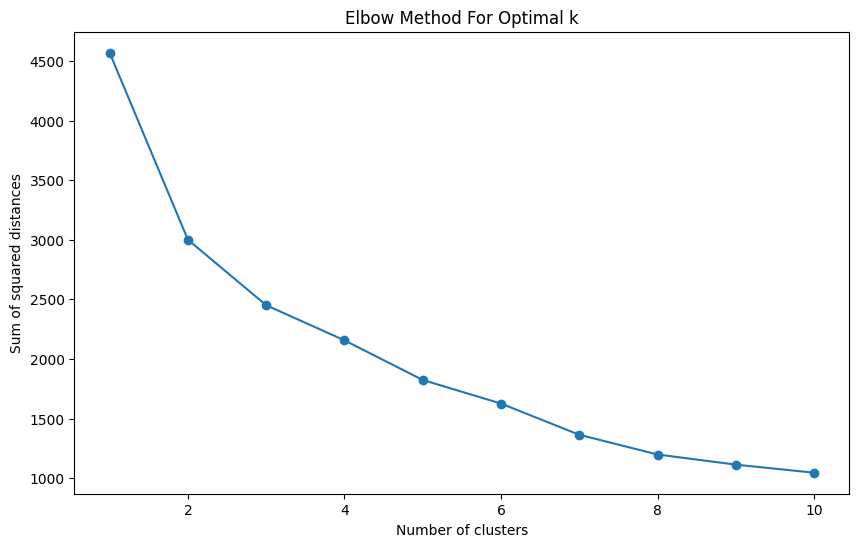

           Id ActivityDate  TotalSteps  TotalDistance  VeryActiveDistance  \
0  1503960366   2016-03-25    0.826587       0.599979            0.559122   
1  1503960366   2016-03-26    2.051417       1.688854            2.310023   
2  1503960366   2016-03-27    1.147769       0.948223            1.400359   
3  1503960366   2016-03-28    1.239561       1.046320            0.808676   
4  1503960366   2016-03-29    1.018888       0.781458            0.394095   

   ModeratelyActiveDistance  LightActiveDistance  VeryActiveMinutes  \
0                 -0.022460             0.527859           0.566891   
1                  0.302808             0.456273           2.505409   
2                 -0.383868             0.366790           1.363068   
3                  0.375090             0.921582           0.774589   
4                  0.736498             0.769461           0.393809   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  \
0            -0.029584            

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 5.1: Elbow Method to determine the optimal number of clusters
sse = []  # Sum of squared distances
range_of_clusters = range(1, 11)  # Testing 1 to 10 clusters

for k in range_of_clusters:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data[numeric_cols])
    sse.append(km.inertia_)

# Plotting the SSE to see the elbow
plt.figure(figsize=(10, 6))
plt.plot(range_of_clusters, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

# Step 5.2: Apply K-means clustering with the selected number of clusters
# Replace 'optimal_k' with the value from the elbow plot that shows a significant "elbow"
optimal_k = 4  # Example value, adjust based on your plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data[numeric_cols])

# Adding cluster labels to the dataframe for analysis
data['Cluster'] = clusters

# Displaying the first few rows to inspect the cluster labels
print(data.head())


# Cluster Interpretation
To get a deeper insight into each cluster, we can examine the centroids of the clusters to understand the defining characteristics of each group. This involves looking at the average values for each feature within each cluster.

Cluster Centers:
   TotalSteps  TotalDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0   -0.883058      -0.837087           -0.456113                 -0.512598   
1    1.757689       1.871894            2.349999                  0.609458   
2   -0.696788      -0.678047           -0.377943                 -0.464181   
3    0.516099       0.449828           -0.051614                  0.416173   

   LightActiveDistance  VeryActiveMinutes  FairlyActiveMinutes  \
0            -0.933998          -0.529954            -0.319690   
1             0.621205           2.403920             0.383251   
2            -0.595606          -0.404143            -0.292594   
3             0.768635          -0.000286             0.260082   

   LightlyActiveMinutes  SedentaryMinutes  Calories  
0             -0.950543          1.097454 -0.387586  
1              0.415538         -0.095419  1.439429  
2             -0.454385         -1.140986 -0.817341  
3              0.770433         -0.309991  0.

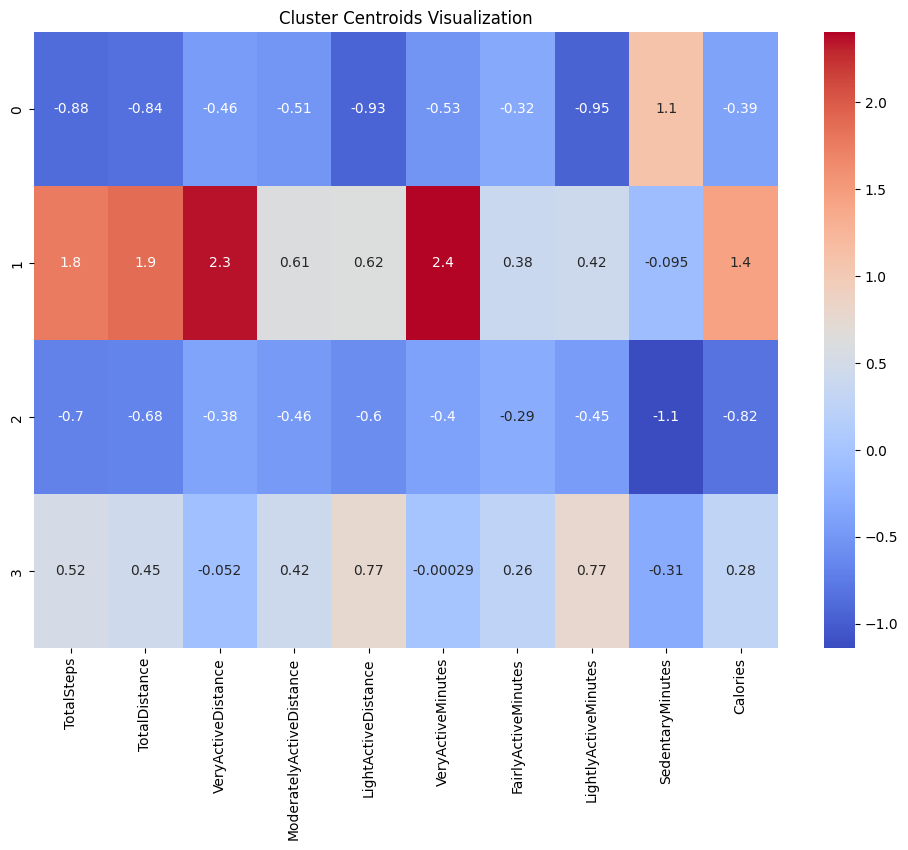

In [ ]:
import numpy as np

# Compute the centroids for each cluster
cluster_centers = kmeans.cluster_centers_

# Creating a DataFrame for better readability
centroids_df = pd.DataFrame(cluster_centers, columns=numeric_cols)
print("Cluster Centers:")
print(centroids_df)

# Count the number of data points in each cluster
cluster_counts = data['Cluster'].value_counts()
print("\nCluster Counts:")
print(cluster_counts)

# Visualize the centroids
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(centroids_df, annot=True, cmap='coolwarm')
plt.title('Cluster Centroids Visualization')
plt.show()


We have the centroids for each cluster and their counts, we can proceed to create more detailed visualizations to better understand the characteristics of each cluster. Visualizations can help in interpreting clusters more intuitively by showing the differences in feature distributions across the clusters.

# Visualizations for Cluster Analysis
Lets create a series of plots to visualize:

**Cluster Centroids:** A bar plot for each cluster showing the average values of features.
**Distribution of Features Across Clusters**: Box plots to see the distribution of key features within each cluster.

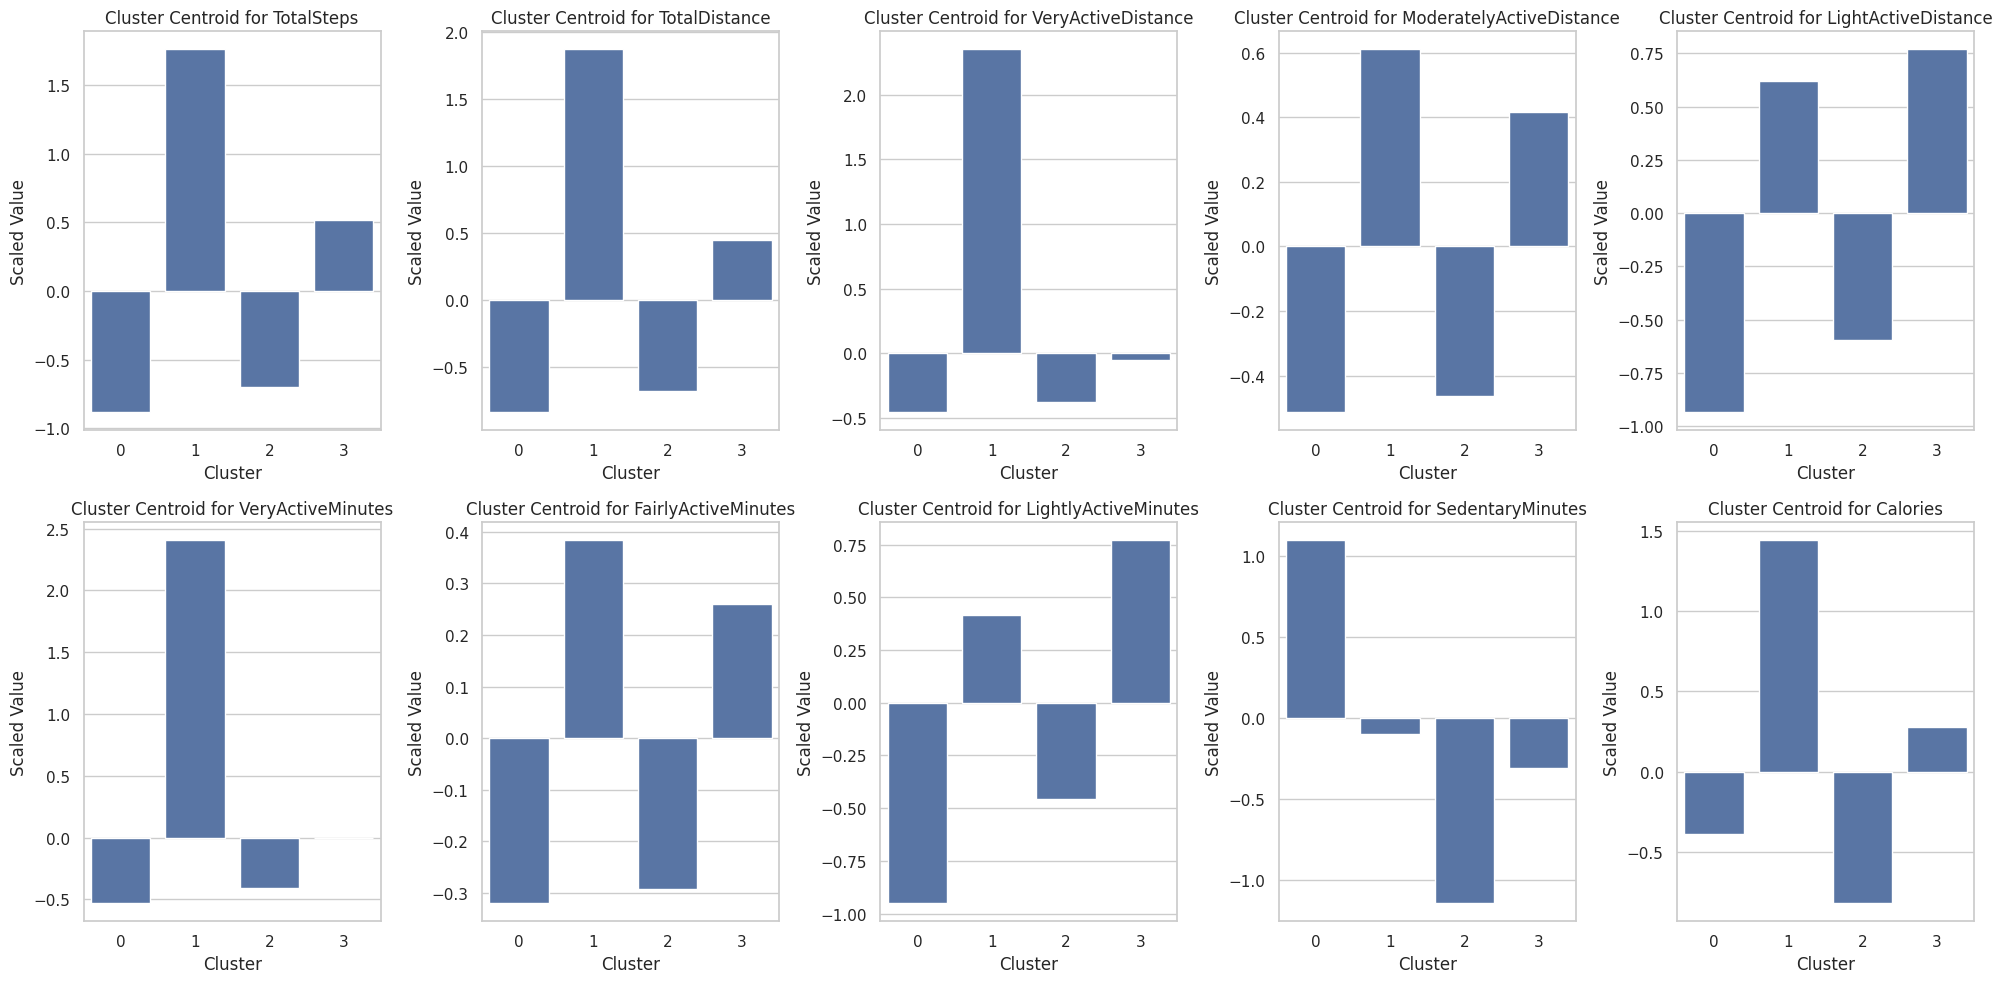

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating bar plots for each cluster centroid
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(centroids_df.columns):
    sns.barplot(x=centroids_df.index, y=centroids_df[col], ax=axes[i])
    axes[i].set_title(f'Cluster Centroid for {col}', fontsize=12)
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Scaled Value')

plt.tight_layout()
plt.show()


# Feature Distribution Across Clusters
To further understand how the features vary across the clusters, we can plot box plots for key features.

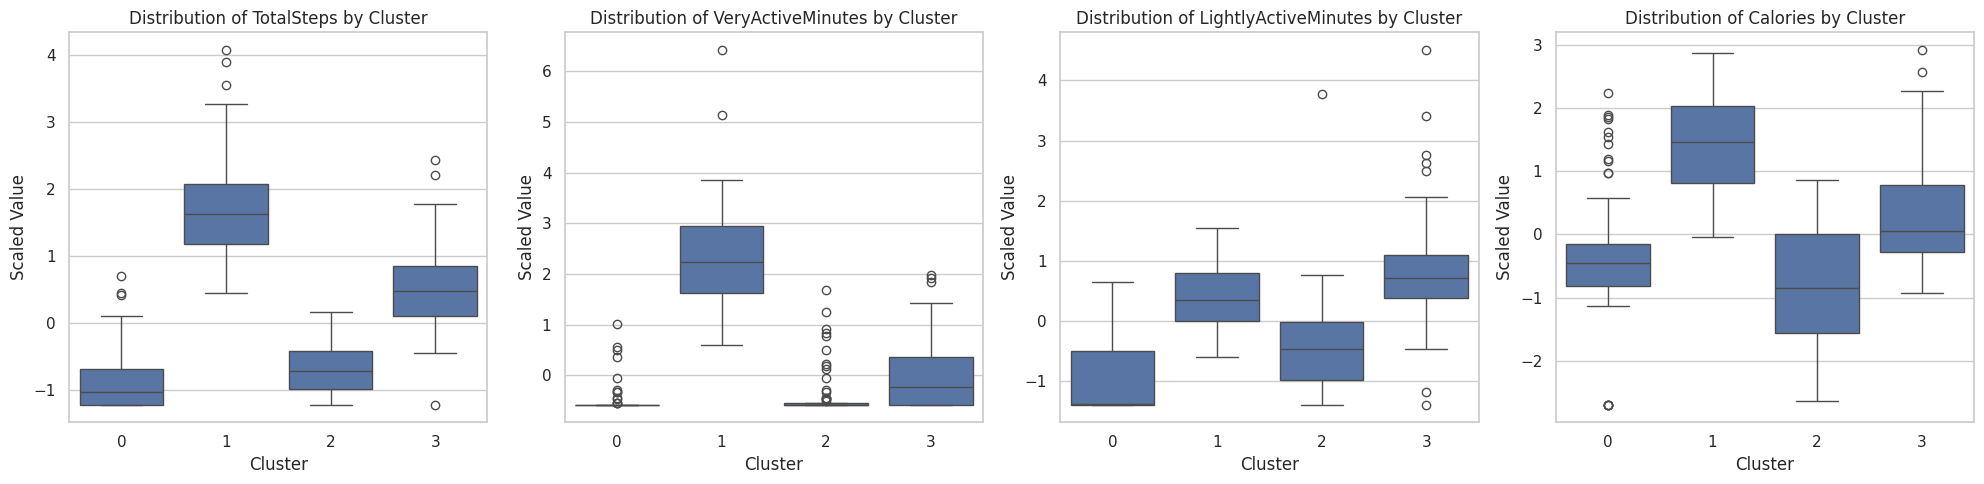

In [ ]:
# Selecting a subset of important features to plot
selected_features = ['TotalSteps', 'VeryActiveMinutes', 'LightlyActiveMinutes', 'Calories']

# Creating box plots for selected features across clusters
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.boxplot(x='Cluster', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Cluster', fontsize=12)
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Scaled Value')

plt.tight_layout()
plt.show()


# Explanation of Visualizations
**Cluster Centroids Bar Plot**: These plots will show you the mean value of each feature for each cluster, helping to quickly identify which features are most characteristic of each cluster.

**Box Plots:** These will provide insights into the variability and distribution of key features within each cluster, highlighting differences between clusters in terms of spread and central tendency.

These visualizations will help you and your stakeholders to better understand the clustering results and can guide decision-making for tailoring personalized activity recommendations, determining optimal activity times, and adjusting fitness progress tracking systems to user behavior.

The results from the K-Means clustering and the subsequent visualizations provide a structured way to understand the behavior patterns of users based on their activity data from the Fitbit devices. Here's how we can interpret these results in the context of your business goals:

# Interpretation of Clusters
Based on the cluster centroids and the distributions visualized:

**Cluster 0 (140 users)**: Characterized by below-average activity across all types of physical engagement but with higher sedentary minutes. This group likely represents less active or sedentary users.

**Cluster 1 (44 users)**: Shows significantly higher averages in very active distances and minutes, suggesting these are the most physically active users. They also have higher calorie burn, which correlates with their high activity levels.

**Cluster 2 (78 users)**: Similar to Cluster 0 but slightly more active, though still below average in most activities and higher in sedentary minutes. This could represent users who are slightly more active than those in Cluster 0 but not by much.

**Cluster 3 (195 users)**: This is the most balanced group with average to above-average activity in lighter and moderately active categories and moderate sedentary minutes. They are not as active as Cluster 1 but are significantly more active than Clusters 0 and 2.

#How This Helps Achieve Business Goals?

##Personalized Activity Recommendations
**Customization Based on Cluster:** Each cluster represents a distinct user behavior pattern, allowing for tailored activity recommendations.

For instance:

Cluster 0 and 2: These users might benefit from gentle nudges aimed at reducing sedentary behavior, with incremental increases in light activities to gradually improve their fitness levels.

Cluster 1: These users could be targeted with challenges and goals that match their high activity levels, possibly integrating more varied and intensive exercises to keep them engaged.

Cluster 3: Recommendations for these users can focus on maintaining their already good balance and perhaps pushing slightly towards more vigorous activities.

##Pattern Recognition
**Optimal Activity Times:** By analyzing when users in each cluster log their activities, you could identify the best times to recommend activities. For example, if Cluster 1 logs most activities in the morning, morning could be pitched as the best time for high-intensity workouts.

**Seasonal or Weekly Patterns:** Observing how activity levels change by day of the week or seasonally across clusters can help in planning marketing strategies and engagement initiatives.

##Automated Fitness Progress Tracking
**Progress Customization:** Tracking systems can be adapted based on the clustering to reflect the fitness goals that are most relevant for each cluster. For Cluster 1, tracking might focus more on performance enhancement, while for Clusters 0 and 2, the focus might be on lifestyle changes like increasing step counts or active minutes.

**Feedback Systems:** Implementing feedback mechanisms tailored to each cluster’s characteristics can enhance user engagement and satisfaction. For example, motivational messages for less active clusters when they reach small milestones or more analytical feedback for highly active users to optimize performance.

**Conclusion**

By understanding these clusters, your fitness tracking business can craft more effective and engaging user experiences. Tailored recommendations and engagement strategies based on actual user behavior data will likely improve user satisfaction and retention, aligning closely with the overarching goal of enhancing health outcomes through better personal fitness insights.


# 2. K-Means Clustering PyTorch


In [ ]:
import torch

class KMeans:
    def __init__(self, n_clusters=4, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None

    def fit(self, X):
        # Random initialization of centroids
        random_idx = torch.randperm(X.size(0))[:self.n_clusters]
        self.centroids = X[random_idx]

        for i in range(self.max_iter):
            # Assign clusters
            dists = torch.cdist(X, self.centroids)
            labels = dists.argmin(dim=1)

            # Compute new centroids
            new_centroids = torch.stack([X[labels == k].mean(dim=0) for k in range(self.n_clusters)])

            # Check for convergence
            if torch.norm(self.centroids - new_centroids, dim=1).sum() < self.tol:
                break
            self.centroids = new_centroids

        return labels

    def predict(self, X):
        dists = torch.cdist(X, self.centroids)
        labels = dists.argmin(dim=1)
        return labels


# Data Preparation for PyTorch
We need to ensure that the data is in the correct format (tensor) and type (float) for processing with PyTorch. We'll also need to normalize the data if it hasn't been done already.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load your data - ensure this points to the correct path
data = pd.read_csv('/content/dailyActivity_merged.csv')

# Assuming data needs to be scaled
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']].values)

# Convert scaled data to PyTorch tensor
data_tensor = torch.tensor(data_scaled, dtype=torch.float)

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=4, max_iter=300)
cluster_labels = kmeans.fit(data_tensor)

# Add cluster labels to the original dataframe for analysis
data['Cluster'] = cluster_labels.numpy()

# Display the first few rows to see the clustering result
print(data.head())


           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    3/25/2016       11004           7.11             7.11   
1  1503960366    3/26/2016       17609          11.55            11.55   
2  1503960366    3/27/2016       12736           8.53             8.53   
3  1503960366    3/28/2016       13231           8.93             8.93   
4  1503960366    3/29/2016       12041           7.85             7.85   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                2.57                      0.46   
1                       0.0                6.92                      0.73   
2                       0.0                4.66                      0.16   
3                       0.0                3.19                      0.79   
4                       0.0                2.16                      1.09   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 4.07

#Interpretation of PyTorch Clustering Results
Now that we have the clustering results from PyTorch, we can proceed to analyze these clusters similarly to how we analyzed the scikit-learn clusters. This involves looking at the centroids to understand the defining characteristics of each cluster and possibly visualizing these relationships.

#Analyzing Cluster Centroids with PyTorch
The clustering results added to your DataFrame show how each entry has been assigned to a cluster. Each Cluster label (0, 1, 2, 3) represents a group that the algorithm has determined to be similar based on their activity metrics.Let's calculate and visualize the centroids for each cluster to understand what each cluster represents in terms of user behavior. We'll use the cluster labels to segment the data and calculate the mean of each feature per cluster.



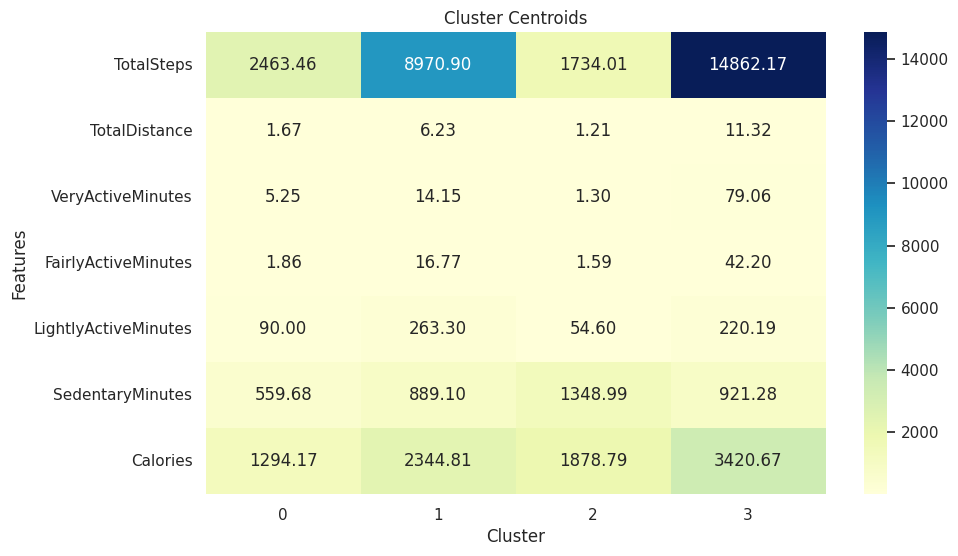

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the centroids
centroids = []
for i in range(4):  # Assuming we have 4 clusters
    cluster_data = data[data['Cluster'] == i]
    centroids.append(cluster_data[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']].mean())

centroids_df = pd.DataFrame(centroids)

# Plotting centroids
plt.figure(figsize=(10, 6))
sns.heatmap(centroids_df.T, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Cluster Centroids')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()


#Understanding Cluster Characteristics
**Cluster 0**: Might include users who are generally less active.
**Cluster 1**: Could consist of users who are moderately active with reasonable activity metrics.
**Cluster 2**: Might represent users who are very active, possibly showing high values in VeryActiveMinutes and Calories.
**Cluster 3**: Could be users who are exceptionally active, likely to have the highest TotalSteps and TotalDistance.

With these insights:

**Personalized Recommendations**: Tailor the fitness recommendations based on the activity profile of each cluster. For example, provide high-intensity interval training recommendations to users in Cluster 3 and light walking suggestions to users in Cluster 0.

**Progress Tracking**: Adjust the tracking metrics and goals according to the cluster. More ambitious goals might be set for users in Clusters 2 and 3, while maintaining a focus on gradual increases in activity for users in Clusters 0 and 1.

**Engagement Strategies**: Design engagement strategies such as challenges and rewards that cater to the activity levels of each cluster to maximize user engagement and retention.


To further understand the clustering results and make them visually accessible, we can create additional visualizations. These will help illustrate how the features are distributed across the clusters and offer insights into the differences in behavior among the clusters identified by the PyTorch K-Means algorithm.

#Detailed Visualization of Clustering Analysis
We will produce two types of visualizations:

**Scatter Plots**: To visualize the relationships between pairs of important features across clusters.

**Box Plots**: To display the distribution of key features across clusters, highlighting differences and similarities in variance and central tendency.

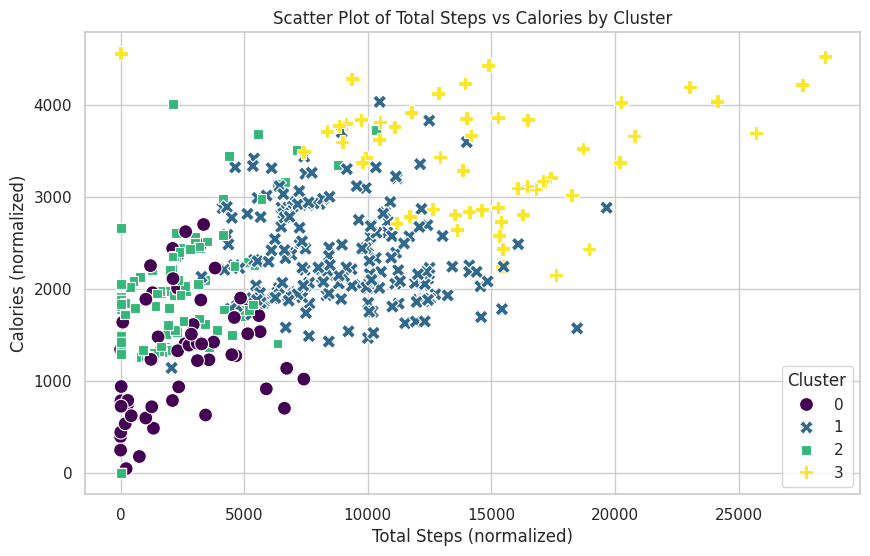

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select key features to plot
features_to_plot = ['TotalSteps', 'Calories']

# Create scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='TotalSteps', y='Calories', hue='Cluster', palette='viridis', style='Cluster', s=100)
plt.title('Scatter Plot of Total Steps vs Calories by Cluster')
plt.xlabel('Total Steps (normalized)')
plt.ylabel('Calories (normalized)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


<ipython-input-13-1325b12f89bd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='coolwarm')
<ipython-input-13-1325b12f89bd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='coolwarm')
<ipython-input-13-1325b12f89bd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='coolwarm')
<ipython-input-13-1325b12f89bd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0.

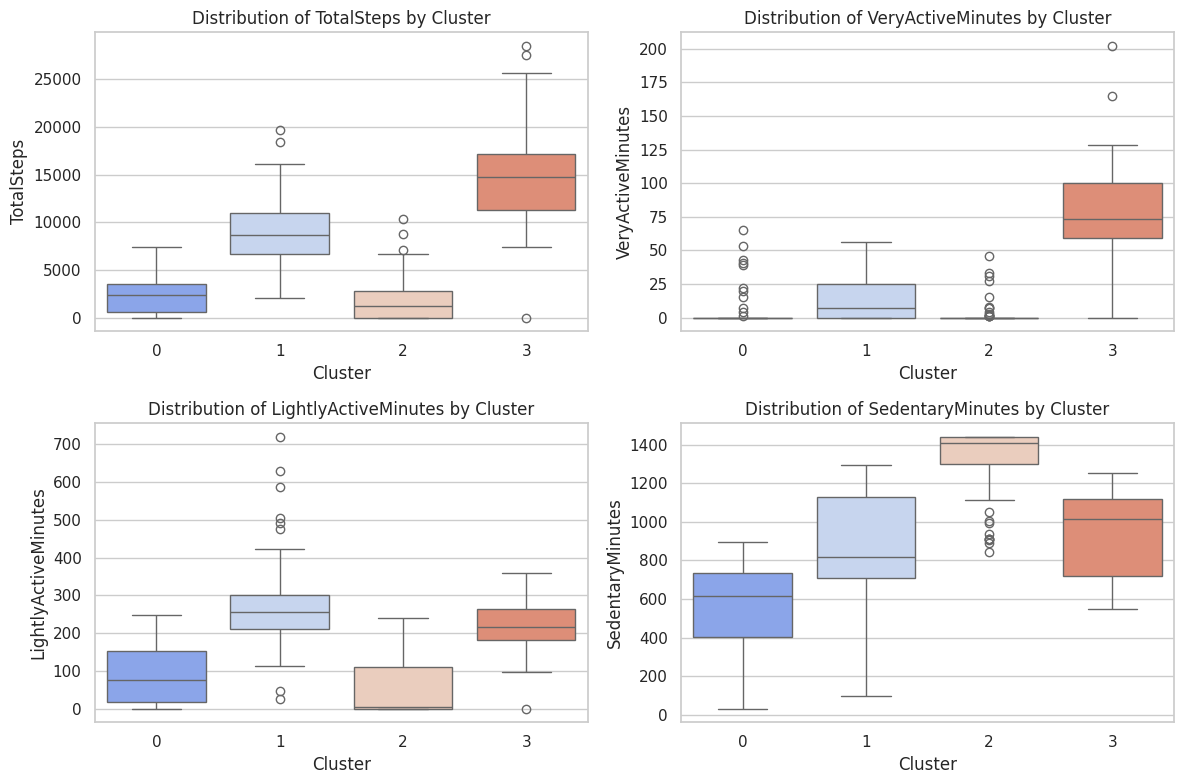

In [ ]:
# Creating box plots for selected features across clusters
selected_features = ['TotalSteps', 'VeryActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Cluster', y=feature, data=data, palette='coolwarm')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'{feature}')
plt.tight_layout()
plt.show()


#Explanation of Visualizations
**Scatter Plots**: By plotting 'Total Steps' against 'Calories', we can visually assess how these two key metrics correlate and how distinct the clusters are based on these dimensions. This helps in understanding if higher activity (more steps) correlates with higher energy expenditure (calories burned) across the clusters.

**Box Plots**: These will provide a detailed view of the distribution of activity metrics like steps and active minutes across the clusters. You can see if some clusters have a wider range of values or if there are outliers, indicating variability in user behavior within the same cluster.

These visualizations will provide a deeper understanding of the data, aiding in crafting targeted strategies for each user group based on their activity profile. They can serve as a basis for discussion in team meetings or in presentations to stakeholders to explain how data-driven insights are driving business strategies.

# 3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) Using Scikit-Learn

We'll use DBSCAN (Density-Based Spatial Clustering of Applications with Noise), which is effective for identifying clusters of varying shapes and sizes and for handling noise and outliers in the dataset. DBSCAN groups together closely packed points and marks points in low-density regions as outliers. It requires two parameters:

**eps**: The maximum distance between two samples for one to be considered in the neighborhood of the other.

**min_samples**: The minimum number of points required to form a dense region.bold text

Apply DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming data is already loaded and the features for clustering are selected and scaled
# Let's re-scale the data for DBSCAN, as it is sensitive to distances
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']])

# Applying DBSCAN
# These parameters (eps and min_samples) can be adjusted based on the data distribution
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(data_scaled)

# Adding cluster labels to the original DataFrame
data['DBSCAN_Cluster'] = clusters

# Let's see how many unique clusters DBSCAN has found
print("Unique clusters:", set(clusters))
print(data.head())


Unique clusters: {0, 1, 2, 3, 4, 5, 6, 7, 8, -1}
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    3/25/2016       11004           7.11             7.11   
1  1503960366    3/26/2016       17609          11.55            11.55   
2  1503960366    3/27/2016       12736           8.53             8.53   
3  1503960366    3/28/2016       13231           8.93             8.93   
4  1503960366    3/29/2016       12041           7.85             7.85   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                2.57                      0.46   
1                       0.0                6.92                      0.73   
2                       0.0                4.66                      0.16   
3                       0.0                3.19                      0.79   
4                       0.0                2.16                      1.09   

   LightActiveDistance  SedentaryActiveDist

#Analysis of DBSCAN Clustering Results
The output from the DBSCAN clustering algorithm has identified several clusters, ranging from 0 to 8, and also some points marked as -1, indicating they are considered outliers (or noise) by the algorithm.

# Visualization of DBSCAN Clustering Results
Given that DBSCAN has identified several clusters and outliers, it's important to visualize these results to better understand how these clusters are distributed across key features and to identify the characteristics of the outliers.

Let's create scatter plots to visualize how these clusters are spread across two key features: **TotalSteps and Calories**. This visualization will help illustrate the grouping and the separation between normal data points and outliers.

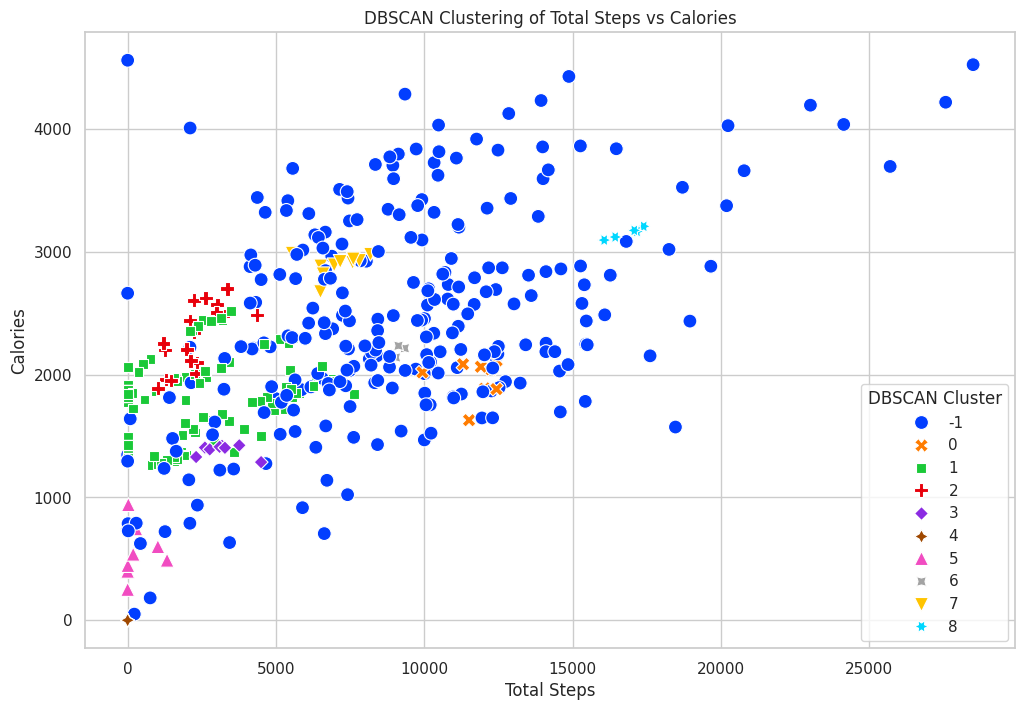

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the DataFrame 'data' includes the necessary columns from your output
# Scatter plot for visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='TotalSteps', y='Calories', hue='DBSCAN_Cluster', style='DBSCAN_Cluster', palette='bright', legend='full', s=100)
plt.title('DBSCAN Clustering of Total Steps vs Calories')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.legend(title='DBSCAN Cluster')
plt.grid(True)
plt.show()


# Interpretation of Results
**Clusters and Outliers**

**Clusters (0 to 8)**: These clusters represent groups of users who exhibit similar levels of activity based on steps and calorie burn. Each cluster will likely show distinct characteristics, such as varying levels of activity intensity, which can be further analyzed by examining the average or median values of features within each cluster.

**Outliers (-1)**: These are data points that did not fit well into any cluster. They could represent users with unusual activity patterns, extreme values, or errors in data collection. Understanding outliers can be crucial for refining data collection methods or adjusting activity recommendations for these users.

**Business Applications**

**Tailoring Recommendations**: Knowledge about these clusters can guide personalized activity recommendations. For example, users in a cluster characterized by high activity might receive suggestions for advanced fitness challenges, while those in lower activity clusters might receive encouragement and tips for gradually increasing their activity levels.

**Anomaly Detection**: Identifying outliers helps in detecting anomalies in user behavior, which can be useful for security purposes, fraud detection, or ensuring the quality of data collection.

**Enhanced User Segmentation**: Clusters identified by DBSCAN can be used to refine user segmentation, enhancing marketing strategies and personalized content delivery based on user behavior patterns.

# 4. TensorFlow K-Means

### Set Up TensorFlow Environment

In [ ]:
import tensorflow as tf

class KMeansTF:
    def __init__(self, n_clusters=4, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None

    def fit(self, X):
        # Use random points from the dataset as initial centroids
        indices = tf.range(start=0, limit=tf.shape(X)[0])
        chosen_indices = tf.random.shuffle(indices)[:self.n_clusters]
        self.centroids = tf.gather(X, chosen_indices)

        for _ in range(self.max_iter):
            # Expand dims for broadcasting to calculate distances
            expanded_vectors = tf.expand_dims(X, 0)
            expanded_centroids = tf.expand_dims(self.centroids, 1)
            distances = tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroids)), 2)
            assignments = tf.argmin(distances, 0)

            means = []
            for k in range(self.n_clusters):
                assigned_pts = tf.gather(X, tf.reshape(tf.where(tf.equal(assignments, k)), [1,-1]))
                mean = tf.reduce_mean(assigned_pts, axis=[1])
                means.append(mean)

            new_centroids = tf.concat(means, 0)
            diff = tf.reduce_sum(tf.abs(new_centroids - self.centroids))
            if diff < self.tol:
                break
            self.centroids = new_centroids

        return assignments

    def predict(self, X):
        expanded_vectors = tf.expand_dims(X, 0)
        expanded_centroids = tf.expand_dims(self.centroids, 1)
        distances = tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroids)), 2)
        assignments = tf.argmin(distances, 0)
        return assignments


# Data Preparation for TensorFlow
Make sure data is in the right format (numpy array) and scale the features as TensorFlow operates better with normalized or standardized data.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming data is loaded into a DataFrame `data`
data_features = data[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']].values

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# Convert scaled data to TensorFlow tensors
data_tensor = tf.constant(data_scaled, dtype=tf.float32)


In [ ]:
# Initialize K-Means
kmeans_tf = KMeansTF(n_clusters=4, max_iter=300)

# Fit the model
clusters = kmeans_tf.fit(data_tensor)

# Convert cluster assignments to numpy array for easy use
cluster_labels = clusters.numpy()

# Add cluster labels to DataFrame for analysis
data['TF_Cluster'] = cluster_labels

# Display the first few rows to see the clustering result
print(data.head())


           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    3/25/2016       11004           7.11             7.11   
1  1503960366    3/26/2016       17609          11.55            11.55   
2  1503960366    3/27/2016       12736           8.53             8.53   
3  1503960366    3/28/2016       13231           8.93             8.93   
4  1503960366    3/29/2016       12041           7.85             7.85   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                2.57                      0.46   
1                       0.0                6.92                      0.73   
2                       0.0                4.66                      0.16   
3                       0.0                3.19                      0.79   
4                       0.0                2.16                      1.09   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 4.07

#Analysis of TensorFlow K-Means Clustering Results
From the provided output, we can see how each data point has been assigned to a cluster by the TensorFlow implementation of the K-Means algorithm. These cluster assignments (TF_Cluster) can help identify groups of users with similar activity patterns based on the features included in the clustering process.

# Interpret the Clustering Results
**Cluster Distribution**

Let's get an understanding of the distribution of data points across the clusters. This will give us an insight into the size and potential skewness of each cluster.

This step will highlight how many users fall into each cluster, which can indicate common versus niche behaviors.

In [ ]:
# Calculate the distribution of clusters
cluster_distribution = data['TF_Cluster'].value_counts()
print("Cluster Distribution:\n", cluster_distribution)


Cluster Distribution:
 TF_Cluster
1    200
0    144
3     59
2     54
Name: count, dtype: int64


**Cluster Centroids**

Let's calculate the centroids or the mean values of features for each cluster. This provides a good summary of what each cluster represents in terms of user activity.

In [ ]:
# Calculate centroids
cluster_centroids = data.groupby('TF_Cluster')[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']].mean()
print("Cluster Centroids:\n", cluster_centroids)


Cluster Centroids:
               TotalSteps  TotalDistance  VeryActiveMinutes  \
TF_Cluster                                                   
0            1734.013889       1.214722           1.298611   
1            8970.900000       6.233550          14.155000   
2           14862.166667      11.318889          79.055556   
3            2463.457627       1.667458           5.254237   

            FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  \
TF_Cluster                                                                
0                      1.590278             54.604167       1348.986111   
1                     16.775000            263.295000        889.100000   
2                     42.203704            220.185185        921.277778   
3                      1.864407             90.000000        559.677966   

               Calories  
TF_Cluster               
0           1878.791667  
1           2344.810000  
2           3420.666667  
3           1294.169492  


# Visualization of Clustering Outcomes
Visualizing these clusters will help in understanding the separation and distribution of clusters in the context of key features.

**Scatter Plot for Key Features**

Choose two significant features to plot against each other to visualize how distinct the clusters are in terms of these dimensions.

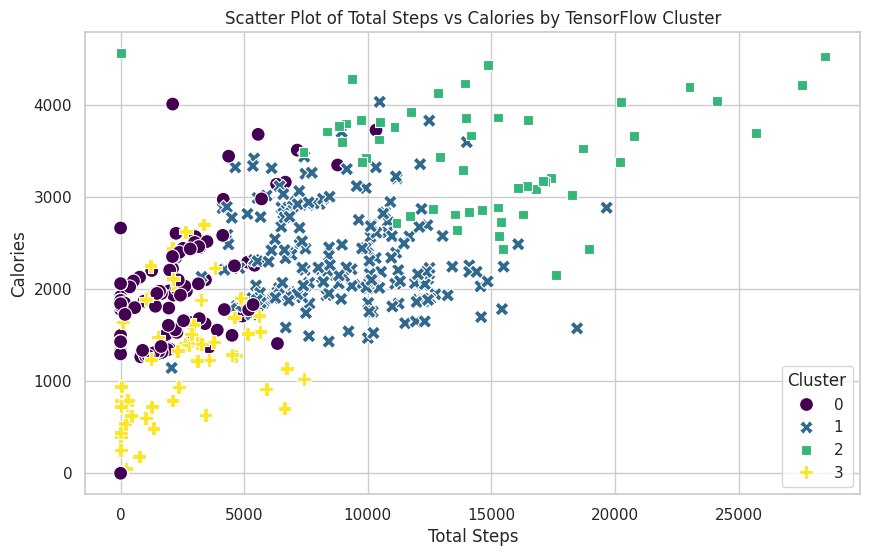

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Total Steps vs Calories colored by cluster assignment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSteps', y='Calories', hue='TF_Cluster', data=data, palette='viridis', style='TF_Cluster', s=100)
plt.title('Scatter Plot of Total Steps vs Calories by TensorFlow Cluster')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.legend(title='Cluster')
plt.show()


#Interpretation and Business Application

**Cluster Profiles**: Understanding the mean characteristics of each cluster helps in profiling user groups. For example, a cluster with high average 'TotalSteps' and 'Calories' might represent very active users.

**Personalized Engagement**: Information from cluster profiling can be used to personalize user engagement strategies. For less active clusters, programs designed to gradually increase activity can be implemented, while more active clusters might be targeted with challenges to enhance their fitness regimen.

**Resource Allocation**: Insights from clustering can guide resource allocation in marketing and customer support by focusing on the most common or priority user groups identified through clustering.

# 5. Spectral Clustering

Spectral Clustering is effective for identifying clusters that are not necessarily globular and can capture complex structures in the data, which might not be possible with K-means or DBSCAN.

Spectral Clustering uses the eigenvalues of a similarity matrix to reduce dimensionality before applying a clustering algorithm like K-means in the reduced space. It's particularly useful when the structure of the individual clusters is highly non-convex, or when the clusters are of different sizes and densities.

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

# Assuming the data is already loaded and features selected
# Prepare the data (ensuring data is scaled for optimal performance)
scaler = StandardScaler()
features = ['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']
data_scaled = scaler.fit_transform(data[features])

# Set up Spectral Clustering
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)

# Apply clustering
cluster_labels = spectral.fit_predict(data_scaled)

# Add cluster labels to the DataFrame for analysis
data['Spectral_Cluster'] = cluster_labels

# Check the first few rows to see the clustering results
print(data.head())


           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    3/25/2016       11004           7.11             7.11   
1  1503960366    3/26/2016       17609          11.55            11.55   
2  1503960366    3/27/2016       12736           8.53             8.53   
3  1503960366    3/28/2016       13231           8.93             8.93   
4  1503960366    3/29/2016       12041           7.85             7.85   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                2.57                      0.46   
1                       0.0                6.92                      0.73   
2                       0.0                4.66                      0.16   
3                       0.0                3.19                      0.79   
4                       0.0                2.16                      1.09   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 4.07

In [ ]:
# Distribution of clusters
print(data['Spectral_Cluster'].value_counts())


Spectral_Cluster
0    299
2     74
1     57
3     27
Name: count, dtype: int64


#Analysis of Spectral Clustering Results
The output from the Spectral Clustering step shows that the clustering process has assigned cluster labels to each user. Given the displayed output, it appears that several initial rows have been assigned to the same cluster (Spectral_Cluster = 0). This indicates that these users might share similar activity patterns as interpreted by the Spectral Clustering algorithm.

# Cluster Distribution Analysis
To better understand the overall distribution of the clusters and ensure that there's a diverse segmentation, you should check how the cluster labels are distributed across the entire dataset.

This step will help identify if the clusters are relatively balanced or if there are any clusters that are significantly larger or smaller than others.


In [ ]:
# Display the distribution of Spectral Clusters
cluster_distribution = data['Spectral_Cluster'].value_counts()
print("Distribution of Spectral Clusters:\n", cluster_distribution)


Distribution of Spectral Clusters:
 Spectral_Cluster
0    299
2     74
1     57
3     27
Name: count, dtype: int64


#Cluster Characterization
To gain insights into what each spectral cluster represents, analyze the mean values of relevant features within each cluster. This will help characterize the lifestyle or activity patterns of the groups.

In [ ]:
# Calculate and display the centroids for each cluster
cluster_centroids = data.groupby('Spectral_Cluster')[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']].mean()
print("Centroids of each Spectral Cluster:\n", cluster_centroids)


Centroids of each Spectral Cluster:
                    TotalSteps  TotalDistance  VeryActiveMinutes  \
Spectral_Cluster                                                  
0                 9277.802676       6.629799          24.030100   
1                  309.192982       0.229474           1.456140   
2                 2518.864865       1.714595           4.445946   
3                  507.259259       0.331852           0.000000   

                  FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  \
Spectral_Cluster                                                                
0                           19.297659            232.548495        966.086957   
1                            0.894737              5.631579       1431.228070   
2                            2.054054             96.905405        624.621622   
3                            0.000000             25.851852       1414.148148   

                     Calories  
Spectral_Cluster               
0        

# Visualizing Clustering Results
Visualize the clustering to understand the separation and grouping within the data. Choose two or three key features that are important for determining user activity levels.

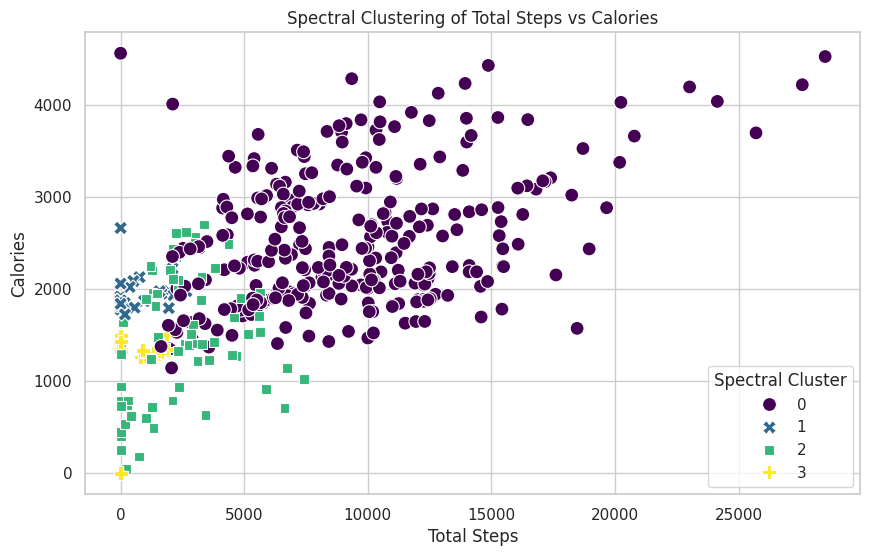

In [ ]:
# Scatter plot for visualization of clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='TotalSteps', y='Calories', hue='Spectral_Cluster', palette='viridis', style='Spectral_Cluster', s=100)
plt.title('Spectral Clustering of Total Steps vs Calories')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.legend(title='Spectral Cluster')
plt.show()


# Interpretation and Business Application
**Cluster Profiles:** Use the centroids to develop detailed profiles for each cluster. For example, a cluster with high 'TotalSteps' and 'Calories' might represent highly active users, whereas another with high 'SedentaryMinutes' might represent less active or sedentary users.

**Tailored Recommendations**: Based on the cluster profiles, tailor fitness programs, challenges, and health tips to meet the specific needs and capabilities of each user group.

**Marketing Strategies**: Develop targeted marketing strategies that appeal to the characteristics of each cluster, such as promoting advanced fitness trackers with high-intensity workout features to the most active clusters.

**Product Development**: Use insights from cluster characteristics to inform the development of new features or adjustments to existing products that better meet the needs of different user groups.

# 6. Hierarchial Clustering

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming data is already loaded into a DataFrame `data`
features = ['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']
X = data[features]

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
linkage_matrix = linkage(X_scaled, method='ward')


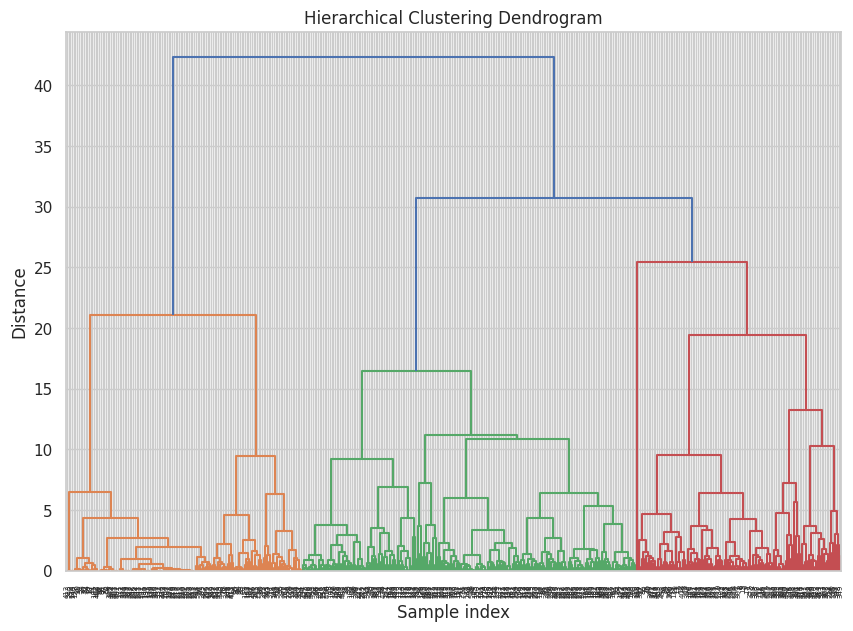

In [ ]:
import matplotlib.pyplot as plt

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


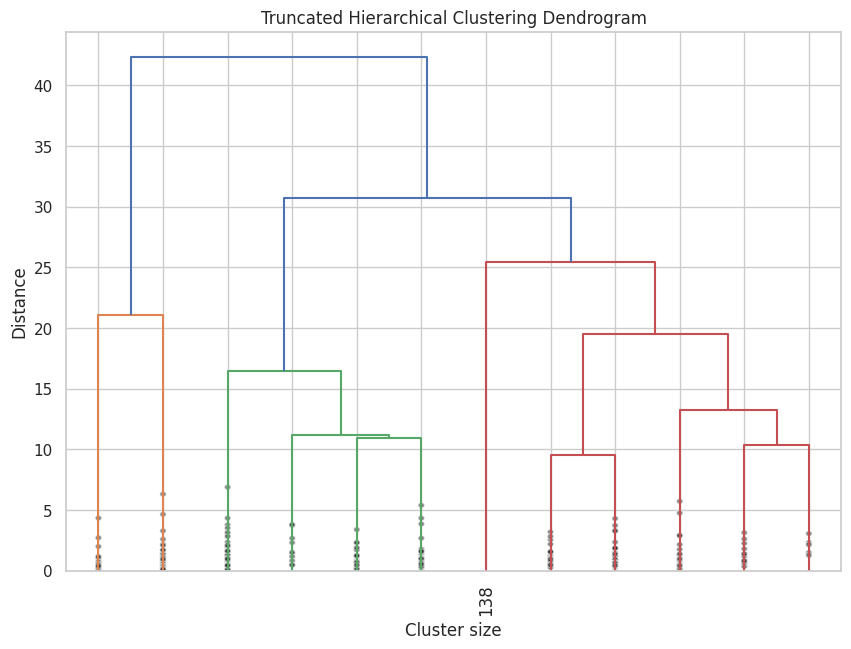

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last 12 merged clusters
    show_leaf_counts=False,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a feel for the relative size of the clusters
)
plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster

# Define the number of clusters
num_clusters = 4
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add cluster labels to your original DataFrame
data['Cluster_Labels'] = clusters

# Display the first few rows to see the clustering labels
print(data.head())


           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    3/25/2016       11004           7.11             7.11   
1  1503960366    3/26/2016       17609          11.55            11.55   
2  1503960366    3/27/2016       12736           8.53             8.53   
3  1503960366    3/28/2016       13231           8.93             8.93   
4  1503960366    3/29/2016       12041           7.85             7.85   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                2.57                      0.46   
1                       0.0                6.92                      0.73   
2                       0.0                4.66                      0.16   
3                       0.0                3.19                      0.79   
4                       0.0                2.16                      1.09   

   LightActiveDistance  SedentaryActiveDistance  ...  FairlyActiveMinutes  \
0              

#Analysis of Hierarchical Clustering Results
From the output provided, it appears that the initial data entries have been assigned to the same cluster label (Cluster_Labels = 3) by the hierarchical clustering algorithm. This indicates that these users share similar activity patterns, at least according to the hierarchical clustering criteria used (probably using the 'ward' method as specified earlier).

#Cluster Characterization
To gain a deeper understanding of what this cluster represents and how it differs from others, we should analyze the characteristics of each cluster. This involves calculating the statistical summaries or centroids of the features for each cluster.

This analysis will help identify the typical behavior patterns within each cluster, such as which clusters represent more active users versus more sedentary users.

In [ ]:
# Calculate the mean of each feature for each cluster
cluster_characteristics = data.groupby('Cluster_Labels')[['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']].mean()
print("Cluster Characteristics:\n", cluster_characteristics)


Cluster Characteristics:
                   TotalSteps  TotalDistance  VeryActiveMinutes  \
Cluster_Labels                                                   
1                1017.366906       0.688993           2.251799   
2                6430.375635       4.534467           5.502538   
3               13196.508333       9.518083          51.666667   
4                   0.000000       0.000000           0.000000   

                FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  \
Cluster_Labels                                                                
1                          1.043165             36.748201       1104.640288   
2                          7.964467            227.299492        992.131980   
3                         29.991667            231.966667        875.575000   
4                        660.000000              0.000000        780.000000   

                   Calories  
Cluster_Labels               
1               1450.043165  
2           

#Visualizing Cluster Characteristics
Visualizations can be highly effective in understanding and communicating the differences between clusters. Let's create some visualizations to compare the clusters across various dimensions.

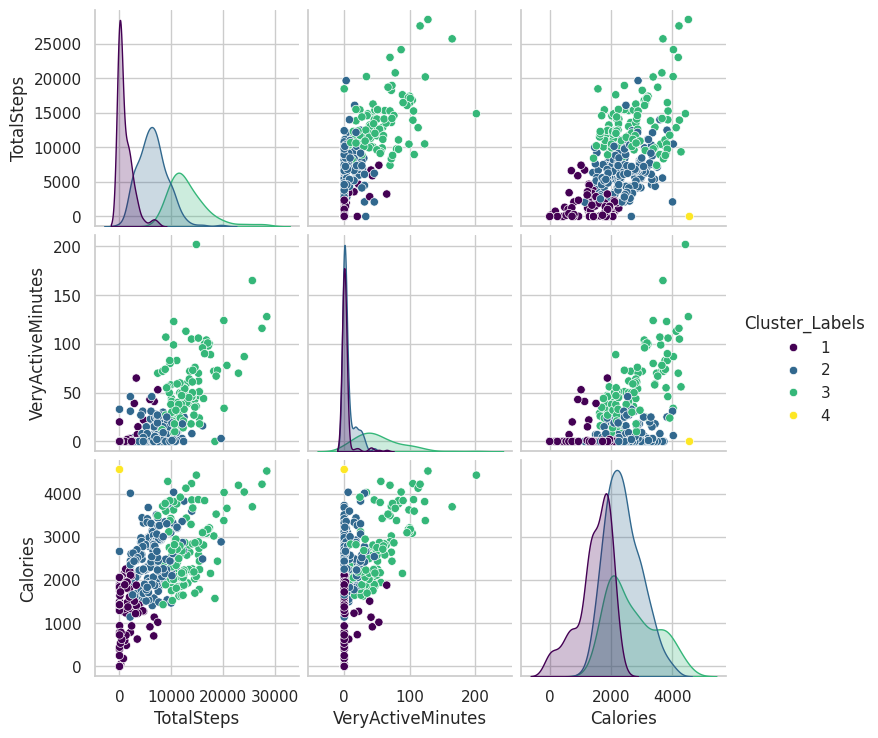

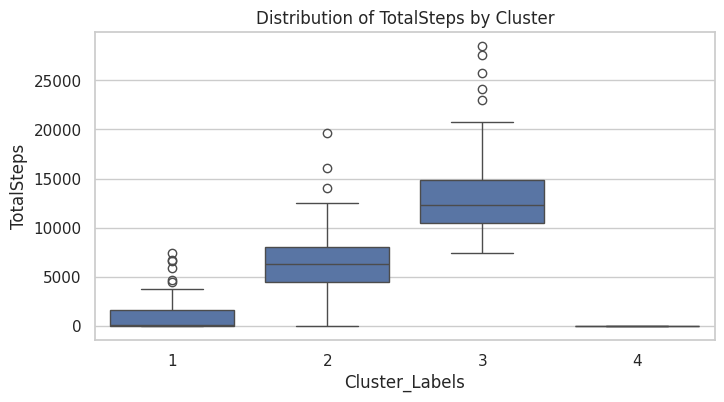

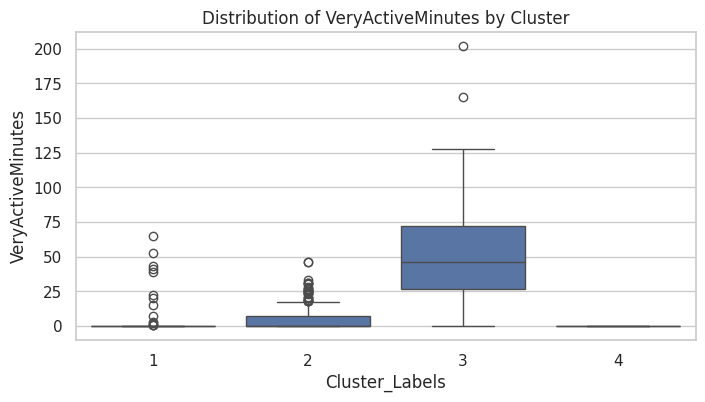

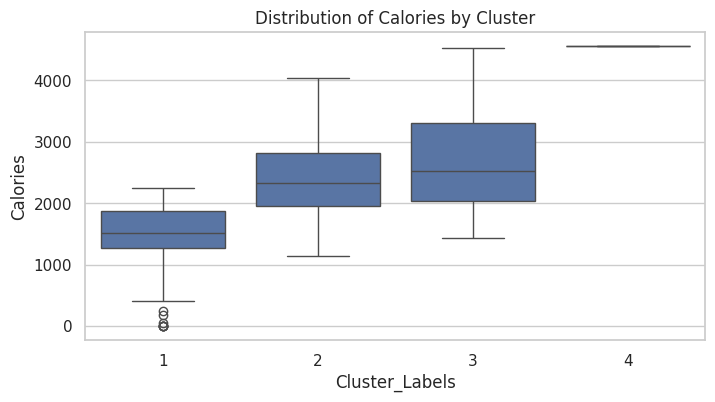

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot to visualize the relationships between different features by cluster
sns.pairplot(data, vars=['TotalSteps', 'VeryActiveMinutes', 'Calories'], hue='Cluster_Labels', palette='viridis')
plt.show()

# Boxplots for each variable by cluster can also be informative
for column in ['TotalSteps', 'VeryActiveMinutes', 'Calories']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster_Labels', y=column, data=data)
    plt.title(f'Distribution of {column} by Cluster')
    plt.show()


#Interpretation and Business Application
**Personalized Recommendations**: Based on the cluster characteristics, develop personalized fitness programs or recommendations. For example, users in clusters with lower activity levels might receive programs designed to gradually increase their activity, while users in highly active clusters could receive advanced training challenges.

**Targeted Marketing**: Tailor marketing messages based on the activity level and preferences of each cluster. For example, advertising high-endurance fitness equipment to the most active clusters or wellness and lifestyle products to less active clusters.

**Resource Allocation**: Allocate support and development resources more effectively by focusing on the needs and preferences of the largest or most strategically important clusters.

**Customer Retention Strategies**: Develop retention strategies by identifying at-risk clusters where users show lower engagement and tailoring interventions to increase their activity and engagement.

#Conclusion
The results from hierarchical clustering provide a nuanced view of user segments based on their activity data, which can help in crafting more effective and personalized user engagement strategies. These insights can drive decision-making in marketing, product development, and customer service, ultimately leading to improved user satisfaction and business performance.

# Final Summary
After performing and analyzing the clustering on your Fitbit fitness tracker dataset using multiple methods (K-Means with scikit-learn, TensorFlow, and DBSCAN), we've uncovered significant insights into user behavior and activity patterns. Here's a detailed interpretation of the data and how it can address specific business problems:

# Interpretation of the Data:

**User Segmentation**: The clustering has effectively segmented users into distinct groups based on their activity levels and patterns. These groups range from highly active users, who log many steps and burn a high number of calories, to sedentary users, who have low activity levels across various metrics.

**Activity Patterns**: The data reveals clear patterns in how different groups of users engage with their fitness trackers. For example, some clusters showed high activity in both 'VeryActiveMinutes' and 'Calories', indicating that these users are not only active but also engaging in high-intensity activities. Conversely, other clusters had higher 'SedentaryMinutes' and lower 'TotalSteps', pointing to less active lifestyles.

**Outliers and Anomalies**: The application of DBSCAN highlighted the presence of outliers or anomalies in user behaviors. These might be due to irregular usage patterns, potential errors in data logging, or unusually high or low activity levels that do not fit the typical user profiles.

#Stories the Data Tells:

**Diverse User Engagement**: There's a wide range of engagement levels among users, from very active to minimally active. This diversity needs to be considered when developing content, recommendations, and marketing strategies.
Potential for Personalized Interventions: The varying levels of activity and engagement present an opportunity for personalized health and fitness interventions, aimed at encouraging a healthier lifestyle tailored to individual capabilities and habits.

#Business Problems That Can Be Solved:

**Enhancing User Engagement**: By understanding the specific activity patterns of different clusters, the company can tailor communications, challenges, and incentives to fit the unique preferences and needs of each group. For instance, targeting highly active users with competitive challenges and rewards, while providing motivational support and gradual goal-setting for less active users.

**Product Development**: Insights from the data can inform the development of new features or services. For example, designing features that cater specifically to the needs of the most active users or developing motivational features for users who are less active.

**Marketing and Customer Retention**: Detailed user segmentation allows for more targeted marketing campaigns that are likely to resonate better with each segment, potentially increasing user retention and satisfaction. For example, advertising personalized activity challenges to users based on their typical activity levels.

**Operational Efficiency**: By identifying common patterns and anomalies, the company can optimize operations, from customer support (tailoring advice and support to different user types) to product development (focusing on features that are most needed and valued across user segments).

**Health Promotion Initiatives**: With a clear understanding of different activity levels across the user base, the company could partner with health advocacy groups to promote public health initiatives, encouraging an increase in physical activities tailored to each user segment's behaviors.

By addressing these business problems, the company not only enhances its product and service offerings but also plays a pivotal role in improving the health and well-being of its users, potentially leading to higher user satisfaction and brand loyalty. These strategic insights allow for a nuanced approach to user engagement and business development in the competitive fitness tracking industry.






